In [1]:
import pandas as pd
import numpy as np
import shutil
import subprocess
import time
import pandas as pd
import sqlite3
import numpy as np
calibration_start_time = time.time()

def assignNewTurn(TurnDf,InflowDf,initial_solution):
    # Between Amin Dr. and  I-75 SB Off Ramp 
    TurnDf.loc[(TurnDf['entrance'] == 680) & (TurnDf['exit'] == 697), 'turn'] = initial_solution[0]*100
    TurnDf.loc[(TurnDf['entrance'] == 680) & (TurnDf['exit'] == 674), 'turn'] = (1-initial_solution[0])*100
    TurnDf.loc[(TurnDf['entrance'] == 680) & (TurnDf['exit'] == 669), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 701) & (TurnDf['exit'] == 669), 'turn'] = initial_solution[1]*100
    TurnDf.loc[(TurnDf['entrance'] == 701) & (TurnDf['exit'] == 697), 'turn'] = (1-initial_solution[1])*100
    TurnDf.loc[(TurnDf['entrance'] == 701) & (TurnDf['exit'] == 674), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 693) & (TurnDf['exit'] == 674), 'turn'] = initial_solution[2]*100
    TurnDf.loc[(TurnDf['entrance'] == 693) & (TurnDf['exit'] == 669), 'turn'] = (1-initial_solution[2])*100
    TurnDf.loc[(TurnDf['entrance'] == 693) & (TurnDf['exit'] == 697), 'turn'] = 0
    # Between Napier Rd. and Lifestyle Way1
    TurnDf.loc[(TurnDf['entrance'] == 668) & (TurnDf['exit'] == 687), 'turn'] = initial_solution[3]*100
    TurnDf.loc[(TurnDf['entrance'] == 668) & (TurnDf['exit'] == 675), 'turn'] = (1-initial_solution[3])*100
    TurnDf.loc[(TurnDf['entrance'] == 668) & (TurnDf['exit'] == 684), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 664) & (TurnDf['exit'] == 684), 'turn'] = initial_solution[4]*100
    TurnDf.loc[(TurnDf['entrance'] == 664) & (TurnDf['exit'] == 687), 'turn'] = (1-initial_solution[4])*100
    TurnDf.loc[(TurnDf['entrance'] == 664) & (TurnDf['exit'] == 675), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 704) & (TurnDf['exit'] == 675), 'turn'] = initial_solution[5]*100
    TurnDf.loc[(TurnDf['entrance'] == 704) & (TurnDf['exit'] == 684), 'turn'] = (1-initial_solution[5])*100
    TurnDf.loc[(TurnDf['entrance'] == 704) & (TurnDf['exit'] == 687), 'turn'] = 0
    # Between Napier Rd. and Lifestyle Way2
    TurnDf.loc[(TurnDf['entrance'] == 657) & (TurnDf['exit'] == 668), 'turn'] = initial_solution[6]*100
    TurnDf.loc[(TurnDf['entrance'] == 657) & (TurnDf['exit'] == 666), 'turn'] = (1-initial_solution[6])*100
    TurnDf.loc[(TurnDf['entrance'] == 657) & (TurnDf['exit'] == 703), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 656) & (TurnDf['exit'] == 703), 'turn'] = initial_solution[7]*100
    TurnDf.loc[(TurnDf['entrance'] == 656) & (TurnDf['exit'] == 668), 'turn'] = (1-initial_solution[7])*100
    TurnDf.loc[(TurnDf['entrance'] == 656) & (TurnDf['exit'] == 666), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 684) & (TurnDf['exit'] == 666), 'turn'] = initial_solution[8]*100
    TurnDf.loc[(TurnDf['entrance'] == 684) & (TurnDf['exit'] == 703), 'turn'] = (1-initial_solution[8])*100
    TurnDf.loc[(TurnDf['entrance'] == 684) & (TurnDf['exit'] == 668), 'turn'] = 0
    # Between  Lifestyle Way and Gunbarrel Road
    TurnDf.loc[(TurnDf['entrance'] == 681) & (TurnDf['exit'] == 686), 'turn'] = initial_solution[9]*100
    TurnDf.loc[(TurnDf['entrance'] == 681) & (TurnDf['exit'] == 682), 'turn'] = (1-initial_solution[9])*100
    TurnDf.loc[(TurnDf['entrance'] == 681) & (TurnDf['exit'] == 676), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 660) & (TurnDf['exit'] == 676), 'turn'] = initial_solution[10]*100
    TurnDf.loc[(TurnDf['entrance'] == 660) & (TurnDf['exit'] == 686), 'turn'] = (1-initial_solution[10])*100
    TurnDf.loc[(TurnDf['entrance'] == 660) & (TurnDf['exit'] == 682), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 696) & (TurnDf['exit'] == 682), 'turn'] = initial_solution[11]*100
    TurnDf.loc[(TurnDf['entrance'] == 696) & (TurnDf['exit'] == 676), 'turn'] = (1-initial_solution[11])*100
    TurnDf.loc[(TurnDf['entrance'] == 696) & (TurnDf['exit'] == 686), 'turn'] = 0

    # Between Amin Dr. and  I-75 SB Off Ramp
    InflowDf.loc[(InflowDf['entrance'] == 701), 'flow'] = int(initial_solution[12])
    # Between Napier Rd. and Lifestyle Way1
    InflowDf.loc[(InflowDf['entrance'] == 664), 'flow'] = int(initial_solution[13])   
    # Between Napier Rd. and Lifestyle Way2
    InflowDf.loc[(InflowDf['entrance'] == 656), 'flow'] = int(initial_solution[14])
    # Between  Lifestyle Way and Gunbarrel Road
    InflowDf.loc[(InflowDf['entrance'] == 681), 'flow'] = int(initial_solution[15])
    return TurnDf,InflowDf


initial_solution = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,100,100,100,100])

def genDemand(initial_solution):
    TurnDf = pd.read_csv('turn800_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow800_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn800.csv', index=False, header=False)
    InflowDf.to_csv('inflow800.csv', index=False, header=False)

    TurnDf = pd.read_csv('turn815_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow815_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn815.csv', index=False, header=False)
    InflowDf.to_csv('inflow815.csv', index=False, header=False)

    TurnDf = pd.read_csv('turn830_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow830_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn830.csv', index=False, header=False)
    InflowDf.to_csv('inflow830.csv', index=False, header=False)

    TurnDf = pd.read_csv('turn845_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow845_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn845.csv', index=False, header=False)
    InflowDf.to_csv('inflow845.csv', index=False, header=False)
    
    # cmd1 = '"C:\\Program Files\\Aimsun\\Aimsun Next 23\\Aimsun Next.exe" --project "D:\\RealTwin\\Real-Twin Workflow Paper\\aimsun simulation_0506actuatedsignal\\chatt.ang" --command execute --target 1269'
    cmd1 = '"C:\\Program Files\\Aimsun\\Aimsun Next 23\\aconsole.exe" -script "C:\\Users\\xugua\\Downloads\\RealTwin Calibration\\aimsun simulation_0506actuatedsignal\\importdemand.py" "C:\\Users\\xugua\\Downloads\\RealTwin Calibration\\aimsun simulation_0506actuatedsignal\\chatt.ang"'
    process = subprocess.Popen(cmd1, shell=True)
    # process = subprocess.Popen(cmd1, shell=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    process.wait()

def runAimsun():
    cmd2 = '"C:\\Program Files\\Aimsun\\Aimsun Next 23\\aconsole.exe" --project "C:\\Users\\xugua\\Downloads\\RealTwin Calibration\\aimsun simulation_0506actuatedsignal\\chatt.ang" --command execute --target 955'
    process = subprocess.Popen(cmd2, shell=True)
    process.wait()


def resultAnalysis():
    dataname = "Resources\Outputs\chatt.sqlite"
    con = sqlite3.connect(dataname)
    section0 = pd.read_sql_query("SELECT * from MISECT", con)
    section = section0[(section0['sid'] == 1) & (section0['ent'] == 1)]
    con.close()
    # section.to_excel('section.xlsx', index=False)
    compare = pd.read_excel('compare.xlsx')
    compare = compare.merge(section[['oid', 'count']], left_on='entrance', right_on='oid', how='left')
    compare.drop(columns='oid', inplace=True)
    compare['GEH'] = np.sqrt(2 * ((compare['count'] - compare['realcount']) ** 2) / (compare['count'] + compare['realcount']))
    meanGEH = compare['GEH'].mean()
    GEHPercent = (compare['GEH'] < 5).mean()
    return meanGEH,GEHPercent

In [2]:
import numpy as np
import math

def objective_function(x,Np,ubc):
    y=x.copy()
    y[Np:] = y[Np:]*ubc
    genDemand(y)
    runAimsun()
    value,neighborhood_percent = resultAnalysis()
    return value

# def generate_neighbor(params):
#     # Generate a neighboring solution by slightly modifying the parameters
#     neighbor = np.clip(params + np.random.normal(0, 0.05, size=params.shape), 0, 1)
#     return neighbor

def generate_neighbor(current_params, step_size=0.05):
    # Generate a neighbor by perturbing the current parameters
    perturbation = np.random.uniform(-step_size, step_size, size=current_params.shape)
    neighbor = current_params + perturbation
    # Ensure the new parameters are within the bounds [0, 1]
    neighbor = np.clip(neighbor, 0, 1)
    return neighbor


# def generate_neighbor(current_params, max_perturbation):
#     perturbation = np.random.uniform(-max_perturbation, max_perturbation, size=current_params.shape)
#     new_params = current_params + perturbation
#     return np.clip(new_params, 0, 1)  # Ensure parameters remain within bounds

def acceptance_probability(current_cost, neighbor_cost, temperature):
    if neighbor_cost < current_cost:
        return 1.0
    else:
        return np.exp(-(neighbor_cost - current_cost) / temperature)


# Initialize parameters
num_variables = 16
Np =12  # number of turning ratio variables, remainings should be inflow
ubc = 200

# Other parameter
minGEHset = []
ical = 1

cost_difference = 2
accept_prob = 0.5
# initial_temperature = -cost_difference/(math.log(accept_prob))  #2.885
initial_temperature = 100
initial_params = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])   # medium starting value
current_params = initial_params
current_cost = objective_function(current_params,Np,ubc)
best_value = current_cost 
# print('0')
temperature = initial_temperature
cooling_rate = 0.99
stopping_temperature = 1e-3
max_iteration = 500

best_values_over_time = []

# Simulated Annealing Loop
# while temperature > stopping_temperature:
while ical <= max_iteration:   
    neighbor = generate_neighbor(current_params, step_size=0.25)
    # neighbor = generate_neighbor(current_params, max_perturbation=0.1 * temperature)

    # print('1')
    neighbor_cost = objective_function(current_params,Np,ubc)

    if neighbor_cost < current_cost:
        current_params = neighbor.copy()
        current_cost = neighbor_cost
        if neighbor_cost < best_value:
            best_solution, best_value = neighbor.copy(), neighbor_cost
    else:
        if np.exp(-(neighbor_cost - current_cost) / temperature)> np.random.rand():
            current_params = neighbor.copy()
            current_cost = neighbor_cost            

    # if acceptance_probability(current_cost, neighbor_cost, temperature) > np.random.rand():
    #     current_params = neighbor
    #     current_cost = neighbor_cost
    temperature *= cooling_rate
    print('Calibration iteration {}:'.format(ical))
    print('    minimum mean GEH in this iteration is {}, current best GEH is {}, best GEH to date is {}'.format(neighbor_cost,current_cost,best_value))
    print("Current calibration time is {} sec.".format(time.time() - calibration_start_time))
    best_values_over_time.append(best_value)
    ical += 1

np.savetxt('SA_best_values2.txt', best_values_over_time, fmt='%f')
print(best_solution)
print(best_value)
# best_solution = current_params
# best_value = current_cost

genDemand(best_solution)
runAimsun()
meanGEH,GEHpercent = resultAnalysis()

print("In final results, {} percent GEH is lower than 5.".format(int(GEHpercent*10000)/100))

Calibration iteration 1:
    minimum mean GEH in this iteration is 9.695864165885267, current best GEH is 9.695864165885267, best GEH to date is 9.695864165885267
Current calibration time is 20.468188047409058 sec.
Calibration iteration 2:
    minimum mean GEH in this iteration is 11.641484660229578, current best GEH is 11.641484660229578, best GEH to date is 9.695864165885267
Current calibration time is 30.970417976379395 sec.
Calibration iteration 3:
    minimum mean GEH in this iteration is 12.941268751215544, current best GEH is 12.941268751215544, best GEH to date is 9.695864165885267
Current calibration time is 40.88538956642151 sec.
Calibration iteration 4:
    minimum mean GEH in this iteration is 10.537488799385356, current best GEH is 10.537488799385356, best GEH to date is 9.695864165885267
Current calibration time is 51.03457498550415 sec.
Calibration iteration 5:
    minimum mean GEH in this iteration is 10.656476871790488, current best GEH is 10.656476871790488, best GEH 

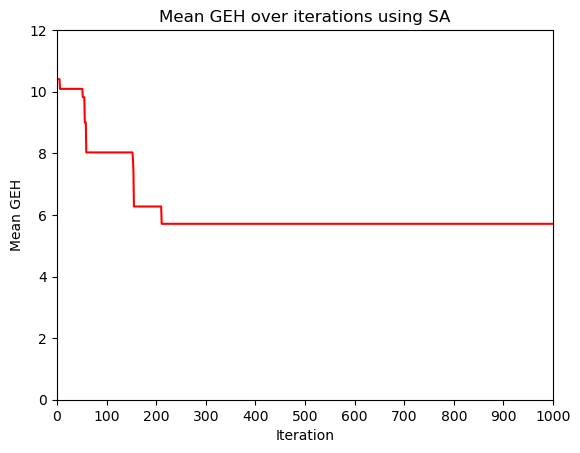

210

In [10]:
import matplotlib.pyplot as plt
import numpy as np
minGEHset = np.loadtxt('SA_best_values.txt', delimiter=',')
# minGEHset = best_values_over_time
plt.plot(range(1,len(minGEHset)+1), minGEHset, '-', color='red') #, markersize=5
plt.xlabel('Iteration')
plt.ylabel('Mean GEH')
plt.title('Mean GEH over iterations using SA')
# plt.legend()
# plt.xticks(ticks=range(0,21))  
plt.xticks(range(0,1001,100))
plt.ylim(0, 12)
plt.xlim(0, 1000)
plt.show()
np.argmin(minGEHset)